In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
col_vals = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 'target']

In [4]:
df_train = pd.read_csv('coffee data/Train data/Decimal(full)/train100.csv', names=col_vals)

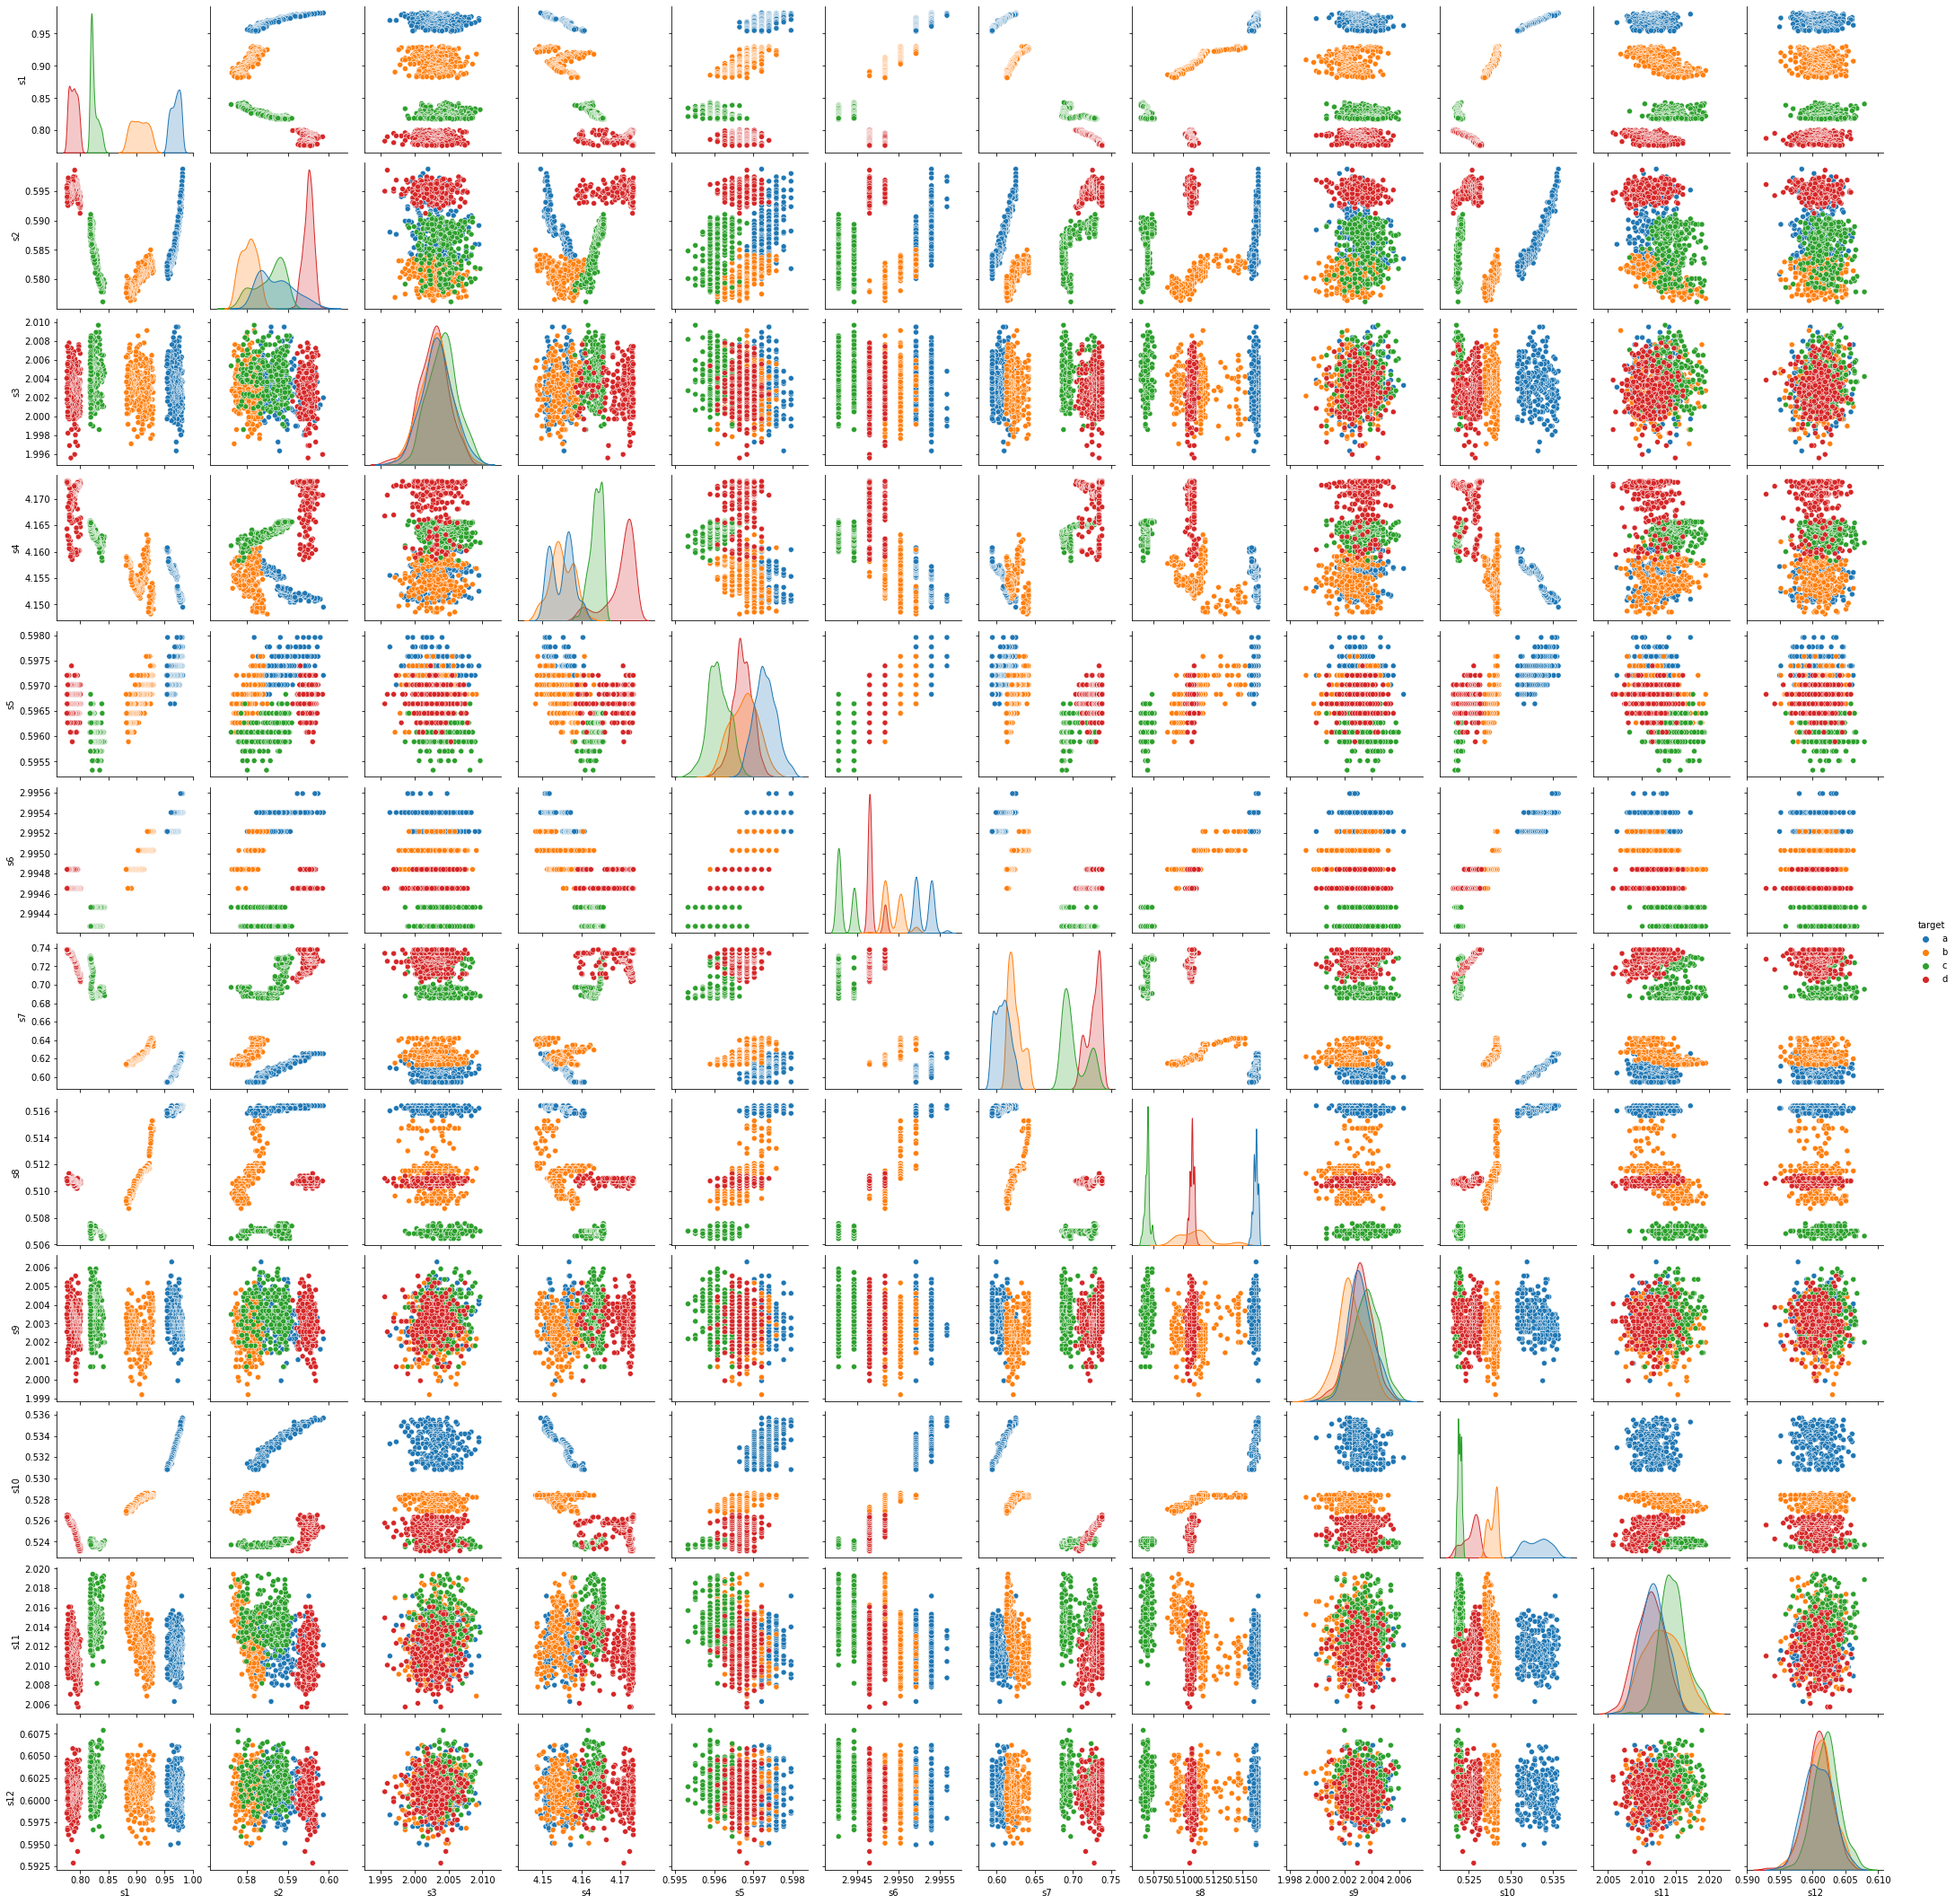

In [23]:
sns.pairplot(df_train, hue='target')

In [5]:
col_vals2 =  ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12']

In [6]:
sample27 = pd.read_csv('coffee data/sample27/testdecimal(full).csv', names=col_vals2)
sample54 = pd.read_csv('coffee data/sample54/testdecimal(full).csv', names=col_vals2)
sample72 = pd.read_csv('coffee data/sample72/testdecimal(full).csv', names=col_vals2)
sample95 = pd.read_csv('coffee data/sample95/testdecimal(full).csv', names=col_vals2)

In [7]:
sample27['target'] = 'd'
sample54['target'] = 'b'
sample72['target'] = 'a'
sample95['target'] = 'c'

In [8]:
df_test = pd.concat([sample27, sample54, sample72, sample95])
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

In [9]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

In [24]:
log_mod = LogisticRegression(max_iter=1000)

In [35]:
log_mod.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
sample27_log_pred = log_mod.predict(sample27.drop('target', axis=1))
sample54_log_pred = log_mod.predict(sample54.drop('target', axis=1))
sample72_log_pred = log_mod.predict(sample72.drop('target', axis=1))
sample95_log_pred = log_mod.predict(sample95.drop('target', axis=1))

In [60]:
y_pred_log = log_mod.predict(X_test)

In [66]:
print(metrics.classification_report(y_test, y_pred_log))
print(metrics.confusion_matrix(y_test, y_pred_log))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00       109
           b       1.00      1.00      1.00        95
           c       0.00      0.00      0.00       100
           d       0.34      1.00      0.51       110

    accuracy                           0.50       414
   macro avg       0.34      0.50      0.38       414
weighted avg       0.32      0.50      0.37       414

[[  0   0   0 109]
 [  0  95   0   0]
 [  0   0   0 100]
 [  0   0   0 110]]


C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
k_range = (1, 40)
score = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

Text(0.5, 0, 'num neighbors')

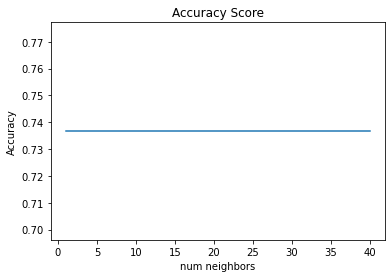

In [15]:
plt.plot(k_range, score)
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('num neighbors')

In [17]:
import joblib

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [18]:
joblib.dump(knn, 'knn_classifier.joblib')

['knn_classifier.joblib']

In [20]:
clf = joblib.load('knn_classifier.joblib')

In [22]:
clf_pred = clf.predict(X_test)

In [23]:
print(metrics.classification_report(y_test, clf_pred))
print(metrics.confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00       109
           b       1.00      1.00      1.00        95
           c       1.00      1.00      1.00       100
           d       0.50      1.00      0.67       110

    accuracy                           0.74       414
   macro avg       0.63      0.75      0.67       414
weighted avg       0.60      0.74      0.65       414

[[  0   0   0 109]
 [  0  95   0   0]
 [  0   0 100   0]
 [  0   0   0 110]]
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

In [14]:
print(metrics.classification_report(y_test, y_pred_knn))
print(metrics.confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00       109
           b       1.00      1.00      1.00        95
           c       1.00      1.00      1.00       100
           d       0.50      1.00      0.67       110

    accuracy                           0.74       414
   macro avg       0.63      0.75      0.67       414
weighted avg       0.60      0.74      0.65       414

[[  0   0   0 109]
 [  0  95   0   0]
 [  0   0 100   0]
 [  0   0   0 110]]
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

In [69]:
 from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier()

In [71]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_rfc = rfc.predict(X_test)

In [79]:
print(metrics.classification_report(y_test, y_pred_rfc))
print(metrics.confusion_matrix(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00       109
           b       1.00      0.60      0.75        95
           c       0.57      1.00      0.72       100
           d       0.61      1.00      0.76       110

    accuracy                           0.64       414
   macro avg       0.54      0.65      0.56       414
weighted avg       0.53      0.64      0.55       414

[[  0   0  38  71]
 [  0  57  38   0]
 [  0   0 100   0]
 [  0   0   0 110]]


C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtc = DecisionTreeClassifier()

In [77]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dtc = dtc.predict(X_test)

In [80]:
print(metrics.classification_report(y_test, y_pred_dtc))
print(metrics.confusion_matrix(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00       109
           b       1.00      0.60      0.75        95
           c       0.72      1.00      0.84       100
           d       0.50      1.00      0.67       110

    accuracy                           0.64       414
   macro avg       0.56      0.65      0.56       414
weighted avg       0.54      0.64      0.55       414

[[  0   0   0 109]
 [  0  57  38   0]
 [  0   0 100   0]
 [  0   0   0 110]]


C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pongp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
